In [237]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def y(x):
    return np.sin(np.pi*x)
#np.exp(-x)

def f(t,x):
    return 0 
#t*np.cos(np.pi*x)

T = 1  # tiempo total
a = 0  # inicio del dominio
b = 1  # fin del dominio
Nx = 29  # número de puntos en el espacio
Nt = 60 # número de puntos en el tiempo
#alpha = T / Nt 
alpha = 0.001 
h = (b - a) / Nx

x_values = np.linspace(a,b,Nx)
t_values = np.linspace(0, T,Nt )
u = np.zeros((Nt, Nx))
u[0, :] = y(x_values)
u[0,-1] = 0
u[0,0] = 0

for i in range(0,Nt-1):
    for j in range(1,Nx-1):
        u[i+1,j]=alpha/(h*h)*(u[i,j+1]+u[i,j-1]) + u[i,j]*(1-(2*alpha/h**2)) + alpha*f(t_values[i],x_values[j])

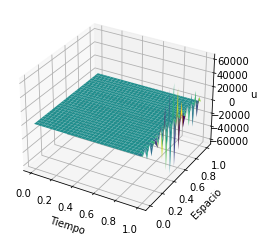

In [238]:
# Crear una gráfica tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear la malla de tiempo y espacio
T_mesh, X_mesh = np.meshgrid(t_values, x_values)

# Graficar la función u en 3D
ax.plot_surface(T_mesh, X_mesh, u.T, cmap='viridis')

# Añadir etiquetas a los ejes
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('u')

# Mostrar la gráfica
plt.show()

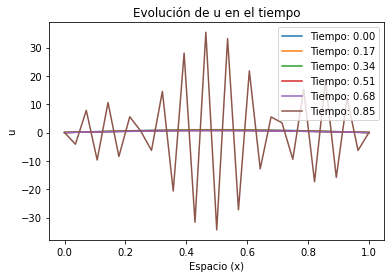

In [239]:
# Gráficos
for i in range(0, Nt, Nt // 6):  # Graficar cada 1/6 de tiempo
    plt.plot(x_values, u[i, :], label=f'Tiempo: {t_values[i]:.2f}')

plt.xlabel('Espacio (x)')
plt.ylabel('u')
plt.legend()
plt.title('Evolución de u en el tiempo')
plt.show()

In [323]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros y funciones
a, b = 0, 1  # Intervalo en x
T = 100  # Tiempo total
N_x, N_t = 100, 9000  # Número de puntos en x y t
h_x = (b - a) / N_x  # Tamaño del paso en x
h_t = T / N_t  # Tamaño del paso en t

def y0(x):
    return  np.exp(-x) 
    #return np.sin(np.pi*x)

def f(t,x):
    return t*np.cos(np.pi*x)


# Inicializar la matriz y con ceros
y = np.zeros((N_t + 1, N_x + 1))

# Establecer la condición inicial
y[0, :] = y0(np.linspace(a, b, N_x + 1))
y[0,0]=0
y[0,-1]=0

# Implementar el método implícito de Euler
for n in range(N_t):
    # Construir la matriz tridiagonal A para el sistema lineal
    A = np.diag(1 + 2 * h_t / h_x**2 * np.ones(N_x - 1)) + np.diag(-h_t / h_x**2 * np.ones(N_x - 2), k=1) + np.diag(-h_t / h_x**2 * np.ones(N_x - 2), k=-1)

    # Definir el lado derecho del sistema lineal
    b_vector = y[n, 1:-1] + h_t * f((n + 1) * h_t, np.linspace(a, b, N_x + 1)[1:-1])

    # Resolver el sistema lineal
    y_n1_interior = np.linalg.solve(A, b_vector)

    # Actualizar la solución para el siguiente paso de tiempo
    y[n + 1, 1:-1] = y_n1_interior

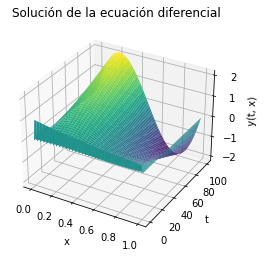

In [324]:
#Crear una malla para plotear
x_mesh, t_mesh = np.linspace(a, b, N_x + 1), np.linspace(0, T, N_t + 1)
x_mesh, t_mesh = np.meshgrid(x_mesh, t_mesh)

# Plotear la solución
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, t_mesh, y, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('y(t, x)')
ax.set_title('Solución de la ecuación diferencial')
plt.show()

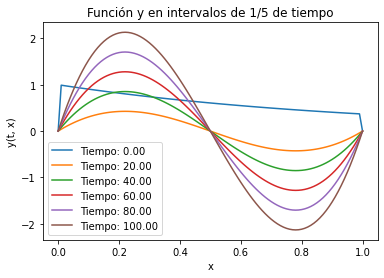

In [325]:
# Graficar la función y en intervalos de 1/5 de tiempo
for tiempo_deseado in range(0, N_t + 1, int(N_t /5)):
    plt.plot(np.linspace(a, b, N_x + 1), y[tiempo_deseado, :], label=f'Tiempo: {tiempo_deseado * h_t:.2f}')

plt.xlabel('x')
plt.ylabel('y(t, x)')
plt.title('Función y en intervalos de 1/5 de tiempo')
plt.legend()
plt.show()


CONDICIONES DE NEUNMAN

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def y(x):
    #return np.sin(np.pi*x)
    return np.exp(-x)

def f(t,x):
    return t*np.cos(np.pi*x)

T = 1  # tiempo total
a = 0  # inicio del dominio
b = 1  # fin del dominio
Nx = 30 # número de puntos en el espacio
Nt = 100 # número de puntos en el tiempo
#alpha = T / Nt 
alpha = 0.001 
h = (b - a) / Nx

x_values = np.linspace(a,b,Nx)
t_values = np.linspace(0, T,Nt )
u = np.zeros((Nt, Nx))
u[0, :] = y(x_values)

for i in range(0,Nt-1):
    for j in range(1,Nx-1):
        u[i+1,j]=(2*alpha)/(h*h)*(u[i,j+1]) + u[i,j]*(1-(2*alpha/h**2)) + alpha*f(t_values[i],x_values[j])

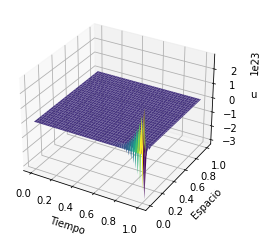

In [81]:
# Crear una gráfica tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear la malla de tiempo y espacio
T_mesh, X_mesh = np.meshgrid(t_values, x_values)

# Graficar la función u en 3D
ax.plot_surface(T_mesh, X_mesh, u.T, cmap='viridis')

# Añadir etiquetas a los ejes
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('u')

# Mostrar la gráfica
plt.show()

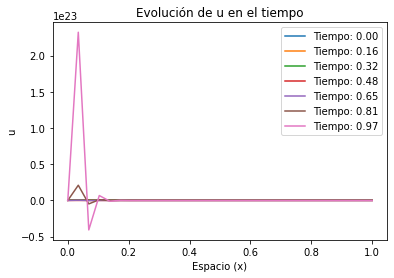

In [82]:
# Gráficos
for i in range(0, Nt, Nt // 6):  # Graficar cada 1/6 de tiempo
    plt.plot(x_values, u[i, :], label=f'Tiempo: {t_values[i]:.2f}')

plt.xlabel('Espacio (x)')
plt.ylabel('u')
plt.legend()
plt.title('Evolución de u en el tiempo')
plt.show()

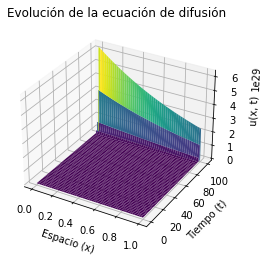

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def y(x):
    # return np.sin(np.pi*x)
    return np.exp(-x)

def f(t, x):
    #return 0
    return t * np.cos(np.pi * x)

T = 100  # tiempo total
a = 0  # inicio del dominio
b = 1  # fin del dominio
Nx = 500  # número de puntos en el espacio
Nt = 100 # número de puntos en el tiempo
alpha = 0.001  # Ajusta este valor según la estabilidad
h = (b - a) / Nx

x_values = np.linspace(a, b, Nx)
t_values = np.linspace(0, T, Nt)
u = np.zeros((Nt, Nx))
u[0, :] = y(x_values)

for i in range(0, Nt-1):
    for j in range(1, Nx-1):
        u[i+1, j] = (alpha * (u[i, j+1] + u[i, j-1]) + (2 - 2*alpha) * u[i, j]
                     + alpha * h**2 * f(t_values[i], x_values[j])) / (1 + alpha * h**2)

# Graficar resultados
X, T = np.meshgrid(x_values, t_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u, cmap='viridis')
ax.set_xlabel('Espacio (x)')
ax.set_ylabel('Tiempo (t)')
ax.set_zlabel('u(x, t)')
ax.set_title('Evolución de la ecuación de difusión')
plt.show()


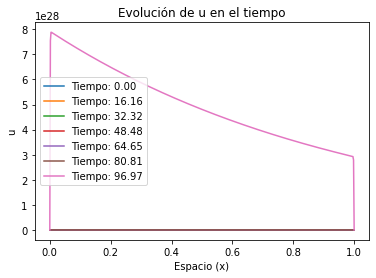

In [92]:
# Gráficos
for i in range(0, Nt, Nt // 6):  # Graficar cada 1/6 de tiempo
    plt.plot(x_values, u[i, :], label=f'Tiempo: {t_values[i]:.2f}')

plt.xlabel('Espacio (x)')
plt.ylabel('u')
plt.legend()
plt.title('Evolución de u en el tiempo')
plt.show()